In [1]:
import os
import sys
import re
import ROOT
import math

Welcome to JupyROOT 6.10/09


In [2]:
File = ROOT.TFile.Open("MEtSys_2017.root")

typeBkgdH = File.Get("typeBkgdH")
if (typeBkgdH == None):
    print "File should contain histogram with the name typeBkgdH "
    sys.exit(-1)

jetBinsH = File.Get("jetBinsH")
if (jetBinsH == None):
    print "File should contain histogram with the name jetBinsH "
    sys.exit(-1)

nBkgdTypes = typeBkgdH.GetNbinsX()
Bkgd = []
nJetBins = jetBinsH.GetNbinsX()
JetBins = []

for i in range(nBkgdTypes):
    Bkgd.append(typeBkgdH.GetXaxis().GetBinLabel(i+1))
for i in range(nJetBins):
    JetBins.append(jetBinsH.GetXaxis().GetBinLabel(i+1))

uncType = ["Response", "Resolution"]

sysUnc = [[[] for x in range(2)] for y in range(nBkgdTypes)]

for i in range(nBkgdTypes):
    histName = Bkgd[i]+"_syst"
    hist = File.Get(histName)
    if (hist == None):
        print "Histogram ", histName, " should be contained in file"
        sys.exit(-1)
    for xBin in range(2):
        for yBin in range(3):
            sysUnc[i][xBin].append(hist.GetBinContent(xBin+1,yBin+1))
            print "Systematics : ", Bkgd[i], "  ", uncType[xBin], " ", JetBins[yBin], " = ", sysUnc[i][xBin][yBin]

responseHist = [[] for x in range(nBkgdTypes)]

for i in range(nBkgdTypes):
    for j in range(nJetBins):
        histName = Bkgd[i]+"_"+JetBins[j]
        print histName
        responseHist[i].append(File.Get(histName))
        if (responseHist[i][j] == None):
            print "Histogram ", histName, " should be contained in file"
            sys.exit(-1)

Systematics :  V    Response   NJet0  =  0.023
Systematics :  V    Response   NJet1  =  0.027
Systematics :  V    Response   NJetGe2  =  0.03
Systematics :  V    Resolution   NJet0  =  0.022
Systematics :  V    Resolution   NJet1  =  0.025
Systematics :  V    Resolution   NJetGe2  =  0.033
Systematics :  EWK    Response   NJet0  =  0.08
Systematics :  EWK    Response   NJet1  =  0.05
Systematics :  EWK    Response   NJetGe2  =  0.03
Systematics :  EWK    Resolution   NJet0  =  0.11
Systematics :  EWK    Resolution   NJet1  =  0.08
Systematics :  EWK    Resolution   NJetGe2  =  0.05
Systematics :  TOP    Response   NJet0  =  0.08
Systematics :  TOP    Response   NJet1  =  0.05
Systematics :  TOP    Response   NJetGe2  =  0.03
Systematics :  TOP    Resolution   NJet0  =  0.11
Systematics :  TOP    Resolution   NJet1  =  0.08
Systematics :  TOP    Resolution   NJetGe2  =  0.05
V_NJet0
V_NJet1
V_NJetGe2
EWK_NJet0
EWK_NJet1
EWK_NJetGe2
TOP_NJet0
TOP_NJet1
TOP_NJetGe2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


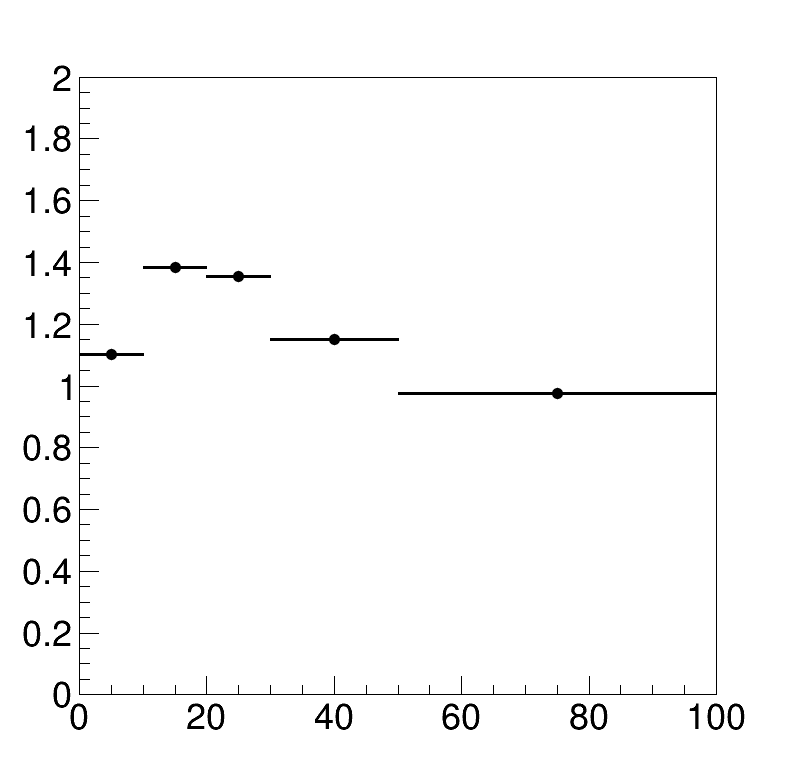

In [10]:
canvas = ROOT.TCanvas('canvas','canvas',800,800)
responseHist[0][1].Draw()
canvas.Draw()

In [21]:
x = -responseHist[0][0].Interpolate(1)*11
x

-6.908568920113688